
# Fast Food Marketing Campaign A\B Test
## IBM Watson Analytics Marketing Campaign




https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:/Users/User/OneDrive/Desktop/BIT/2025 11 12 DUOM/Statistics. VI. Modulis/2026-02-12/WA_Marketing-Campaign.csv")

Tikrinsime kuri iš 3 reklamos kampanijų turi didžiausią efektą naujo produkto pardavimams. (Kurią kampaniją pasirinkti produkto reklamai)

Naujas produktas yra pristatytas atsitiktinai parinktose lokacijose. Skirtinga reklamos kampanija yra naudojama tose lokacijose. Surinkti pirmų 4 savaičių pardavimų duomenys.

## H0: Visos kampanijos vienodos - atmesta?

## HA: Kampanijos skiriasi

In [4]:
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [5]:
df.shape

(548, 7)

In [6]:
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

In [8]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
MarketID,548.0,6.0,3.0,1.0,3.0,6.0,8.0,10.0
LocationID,548.0,480.0,288.0,1.0,216.0,504.0,708.0,920.0
AgeOfStore,548.0,9.0,7.0,1.0,4.0,7.0,12.0,28.0
Promotion,548.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0
week,548.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0
SalesInThousands,548.0,53.0,17.0,17.0,43.0,50.0,60.0,100.0


In [9]:
df["Promotion"].unique()

array([3, 2, 1], dtype=int64)

In [10]:
df["MarketSize"].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [11]:
# Patikriname ar yra nulinių reikšmių

df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

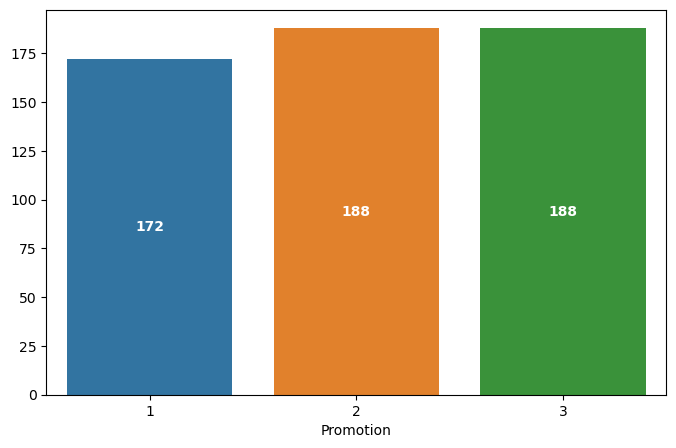

In [23]:
sales = df.groupby("Promotion")["SalesInThousands"].count()

plt.figure(figsize=(8, 5))
ax=sns.barplot(x=sales.index, y=sales.values)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')

plt.show()

In [13]:
# Sugrupuojame duomenis pagal lokaciją. T.y. susumuojame 4 savaičių pardavimus

sugrupuota = df.groupby(["Promotion", "LocationID"], as_index=False).agg(bendri_pardavimai=("SalesInThousands", "sum"))

sugrupuota

,Promotion,LocationID,bendri_pardavimai
0,1,3,162.72
1,1,7,172.97
2,1,9,158.06
3,1,12,151.14
4,1,13,169.49
...,...,...,...
132,3,808,240.81
133,3,809,192.63
134,3,903,207.44
135,3,905,229.30


## Skaičiuojame pasikliautinį intervalą pažingsniui

In [14]:
# suskaičiuojame vidurkį
vidutiniai_pardavimai = sugrupuota[sugrupuota['Promotion'] == 3]['bendri_pardavimai'].mean().round(2)
print(vidutiniai_pardavimai)

221.46


In [15]:
# suskaičiuojame standartinį nuokrypį
std = sugrupuota[sugrupuota["Promotion"] == 3]["bendri_pardavimai"].std()
print(std)

65.53546268462364


In [16]:
# suskaičiuojame reikšmių skaičių
n = sugrupuota[sugrupuota["Promotion"] == 3]["bendri_pardavimai"].count()
print(n)

47


In [17]:
# surandame t statistiką
t_reiksme = stats.t.ppf((1 + 0.95) / 2, df=n-1)
print(t_reiksme)

2.0128955952945886


t reikšmė 2.01:

Jei apskaičiuota t statistika pagal duomenis viršija 2.01 (arba yra mažesnė nei −2.01),

tai reiškia, kad skirtumas tarp kampanijų yra per didelis, kad būtų paaiškintas vien atsitiktinumu.

t kritinė reikšmė apibrėžia, kada pastebėtas kampanijų skirtumas yra pakankamai didelis, kad būtų laikomas realiu, o ne atsitiktiniu.

In [18]:
# suskaičiuojame standartinę paklaidą
standartine_paklaida = std / np.sqrt(n)
print(standartine_paklaida)

9.559329707303213


Standartinė paklaida parodo, kiek patikimas yra apskaičiuotas vidurkis.

In [19]:
# suskaičiuojame paklaidos ribą
margin_of_error = t_reiksme * standartine_paklaida
print(margin_of_error)

19.241932661799346


Paklaidos riba yra 19.24.
Ji parodo, kiek į abi puses nuo imties vidurkio gali būti nutolęs tikrasis populiacijos vidurkis.

Ką tai reiškia praktiškai:

Tikrasis vidurkis gali būti maždaug 19 vienetų mažesnis arba didesnis už apskaičiuotą imties vidurkį.
Tai yra neapibrėžtumo dydis, susijęs su ribotu duomenų kiekiu ir jų kintamumu.

Paklaidos riba nusako, kokio pločio yra pasikliautinis intervalas aplink vidurkį, t.y. Tai reiškia, kad vidurkiu negalima labai pasitikėti.

In [20]:
# apskaičuojame pasikliautinį intervalą, nustatome apatinį ir viršutinį rėžius
pi_apatine, pi_virsutine = vidutiniai_pardavimai - margin_of_error, vidutiniai_pardavimai + margin_of_error
print(f"Pasikliautinis intervalas: ({pi_apatine:.2f}, {pi_virsutine:.2f})")

Pasikliautinis intervalas: (202.22, 240.70)


Tikrasis vidutinis pardavimų lygis šiai kampanijai greičiausiai yra tarp 202 ir 241. Vienas spėjimas. Šis intervalas parodo kiek tas spėjimas gali klysti.

In [21]:
# Funkcija pasikliautinių intervalų skaičiavimui. 

# Persivadinti pagal savo duomenis šiuos kintamuosius: sugrupuota, 'Promotion', 'bendri_pardavimai', marketingo_kampanija

reiksmingumo_lygis = 0.95
for marketingo_kampanija in sugrupuota['Promotion'].unique():
    pardavimai = sugrupuota[sugrupuota['Promotion'] == marketingo_kampanija]['bendri_pardavimai']
    vidurkis = pardavimai.mean()
    st_nuokrypis = pardavimai.std(ddof=1)
    n = pardavimai.count()
    margin_of_error = stats.t.ppf((1 + reiksmingumo_lygis) / 2, df=n-1) * (st_nuokrypis / np.sqrt(n))
    ci_lower, ci_upper = vidurkis - margin_of_error, vidurkis + margin_of_error
    print(f"{marketingo_kampanija}: {reiksmingumo_lygis*100}% Pasikliautinis intervalas: ({ci_lower:.2f}, {ci_upper:.2f})")

1: 95.0% Pasikliautinis intervalas: (212.67, 252.13)
2: 95.0% Pasikliautinis intervalas: (172.29, 206.34)
3: 95.0% Pasikliautinis intervalas: (202.22, 240.70)


Kaip interpretuoti tarpusavyje:

2 kampanijos intervalas yra aiškiai žemiau nei 1 ir 3 kampanijų.
Tai reiškia, kad 2 kampanija generuoja mažesnius pardavimus ir nėra geras pasirinkimas.

1 ir 3 kampanijų intervalai persidengia.
Tai reiškia, kad pagal šiuos duomenis negalima tvirtai pasakyti, jog 1 kampanija yra statistiškai geresnė už 3.

Nors 1 kampanijos vidurkis tikėtina didesnis,
3 kampanija realiai gali duoti labai panašius pardavimus.

# Darbinė hipotezė
h0 kampanija 1 ir 3 tokios pacios
h1 kampanija 1 ir 3 ne tokios pacios

## Funkcijos hipotezių tikrinimui

In [24]:
kampanija1 =sugrupuota[sugrupuota['Promotion']==1]['bendri_pardavimai']
kampanija3 = sugrupuota[sugrupuota['Promotion']==3]['bendri_pardavimai']
stat, p_value = stats.ttest_ind(kampanija1, kampanija3)
round = p_value.round(4)
print(round)

0.4264


Atmetame nulinę hipotezę jei p < alfa  
Alfa pasirenkame pagal norimą reikšmingumo lygį, 0,05, 0,01 ir t.t.

H0 - skirtumo nera  
H1 - skirtumas yra

0,4265 > 0.05  
Šiuo atveju p yra daugiau nei alfa, vadinasi neatmetame H0 ir teigiame, kad nėra statistiškai reikšmingo skirtimo tarp 1 ir 3 marketingo kampanijų

p reikšmė yra 0.4264.

Tai yra didelė p reikšmė, todėl toks skirtumas tarp 1 ir 3 kampanijų labai tikėtinas vien dėl atsitiktinumo.

Sprendimas prie α = 0.05:
Kadangi p > 0.05, nulinė hipotezė neatmetama.
Tai reiškia, kad nėra statistinių įrodymų, jog 1 kampanija yra geresnė už 3.

Kaip tai sieti su anksčiau matytais pasikliautiniais intervalais:

1 ir 3 kampanijų pasikliautiniai intervalai persidengė.
Šis t testas patvirtina tą patį rezultatą skaičiumi.

Praktinė interpretacija verslo kontekste:

Nors 1 kampanijos vidurkis atrodo didesnis,
duomenys neleidžia tvirtai teigti, kad ji realiai veikia geriau nei 3.

Todėl:

pasirinkimas tarp 1 ir 3 kampanijų negali būti pagrįstas vien statistika

sprendimas turėtų remtis papildomais kriterijais (kaina, rizika, strategija)



Pagal turimus duomenis 1 ir 3 reklamos kampanijos veikia panašiai, o statistinio skirtumo tarp jų nerasta.

lyginant 1 ir 2 kampanijas - kampanija2 - fail

In [25]:
kampanija1 =sugrupuota[sugrupuota['Promotion']==1]['bendri_pardavimai']
kampanija2 = sugrupuota[sugrupuota['Promotion']==2]['bendri_pardavimai']
stat, p_value = stats.ttest_ind(kampanija1, kampanija2)
round = p_value.round(4)
print(round)

0.0012


Tai yra labai maža p reikšmė, todėl toks skirtumas tarp kampanijų beveik neįmanomas vien dėl atsitiktinumo.

Sprendimas prie α = 0.05:
Kadangi p < 0.05, nulinė hipotezė atmetama.
Tai reiškia, kad tarp 1 ir 2 kampanijų yra statistiškai reikšmingas skirtumas.

Praktinė interpretacija duomenų analitikoje:

1 kampanija generuoja reikšmingai didesnius pardavimus nei 2 kampanija.
Šis rezultatas sutampa su tuo, ką matėme pasikliautiniuose intervaluose.

Verslo sprendimas:

2 kampanija yra silpniausia ir neturėtų būti pasirenkama naujo produkto reklamai.
1 kampanija akivaizdžiai lenkia 2 kampaniją pagal pardavimus.

Svarbi pastaba:

Statistinis reikšmingumas parodo, kad skirtumas yra realus,
tačiau sprendimą vis tiek reikia derinti su kaštais ir strategija.


1 reklamos kampanija veikia reikšmingai geriau nei 2 kampanija.

## lyginam 3 ir 2

In [26]:
kampanija3 =sugrupuota[sugrupuota['Promotion']==3]['bendri_pardavimai']
kampanija2 = sugrupuota[sugrupuota['Promotion']==2]['bendri_pardavimai']
stat, p_value = stats.ttest_ind(kampanija3, kampanija2)
round = p_value.round(4)
print(round)

0.0135


p reikšmė yra 0.0135.

Tai yra maža p reikšmė, todėl toks skirtumas tarp kampanijų mažai tikėtinas vien dėl atsitiktinumo.

Sprendimas prie α = 0.05:
Kadangi p < 0.05, nulinė hipotezė atmetama.
Tai reiškia, kad tarp 3 ir 2 kampanijų yra statistiškai reikšmingas skirtumas.

**Praktinė interpretacija duomenų analitikoje:**

3 kampanija generuoja reikšmingai didesnius pardavimus nei 2 kampanija.
Tai patvirtina, kad 2 kampanija yra silpniausia.


Galutinė išvada verslo kontekste:

2 kampanija veikia reikšmingai prasčiau.
1 ir 3 kampanijos veikia panašiai, statistinio skirtumo tarp jų nerasta.

**AB analizės išvada**

Renkantis kampaniją, 2 galima atmesti, o sprendimas tarp 1 ir 3 turi būti grindžiamas ne statistika, o kitais verslo kriterijais.

Svarbu:

Kadangi atliekami keli poriniai testai (1 vs 2, 1 vs 3, 2 vs 3),
reikėtų taikyti korekciją (pvz., Bonferroni).

Jei taikoma Bonferroni korekcija (α = 0.05 / 3 ≈ 0.0167):

p = 0.0135 vis dar būtų reikšminga

p = 0.0012 (1 vs 2) būtų reikšminga

p = 0.4264 (1 vs 3) liktų nereikšminga


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Grupės pagal kampaniją
promo1 = df[df["Promotion"] == 1]["SalesInThousands"]
promo2 = df[df["Promotion"] == 2]["SalesInThousands"]
promo3 = df[df["Promotion"] == 3]["SalesInThousands"]

In [28]:
f_stat, p_value = stats.f_oneway(promo1, promo2, promo3)

f_stat, p_value


(21.953485793080677, 6.765849261408714e-10)

Interpretacija:

p < 0.05 → atmetame H₀ → kampanijos skiriasi

p ≥ 0.05 → nepakanka įrodymų skirtumui

## ANOVA testo rezultatai – reklamos kampanijų palyginimas

#### Gauti rezultatai
- **F-statistic:** 21.95  
- **p-value:** 6.77 × 10⁻¹⁰  

#### Statistinis sprendimas

Kadangi **p-value ≪ 0.05**, daroma išvada:

- **Nulinė hipotezė (H₀) atmetama**
- Vidutiniai pardavimai tarp reklamos kampanijų **nėra vienodi**
- **Bent viena iš 3 kampanijų turi statistiškai reikšmingai kitokį poveikį pardavimams**

#### Ką reiškia F-statistic?

- F-statistic matuoja, **kiek stipriai skiriasi grupių vidurkiai**, lyginant su vidiniu grupių išsibarstymu
- Didelė F reikšmė reiškia, kad:
  - skirtumai tarp kampanijų yra didesni nei atsitiktiniai svyravimai

#### Verslo interpretacija

- Reklamos kampanijos **veikia skirtingai**
- Sprendimas, kurią kampaniją naudoti produkto reklamai, **gali būti pagrįstas duomenimis**
- Nebereikia remtis intuicija ar nuomone

### Svarbi pastaba

ANOVA testas:
- **Neparodo**, kuri konkrečiai kampanija yra geriausia
- Tik patvirtina, kad **skirtumas egzistuoja**

Todėl kiti būtini žingsniai:
- palyginti kampanijų **vidurkius**
- atlikti **post-hoc (Tukey) testą**, siekiant nustatyti, **kurios kampanijos tarpusavyje skiriasi**


## Hipotezių testavimas

We establish two hypotheses, H0 (Null hypothesis) and Ha (Alternative Hypothesis). 

We can make four different decisions with hypothesis testing:
1. Reject H0 and H0 is not true (no error)
2. Do not reject H0 and H0 is true (no error)
3. Reject H0 and H0 is true (Type 1 Error)
4. Do not reject H0 and H0 is not true (Type 2 error)

Type 1 error is also called Alpha error.
Type 2 error is also called Beta error.

![](https://qph.fs.quoracdn.net/main-qimg-84121cf5638cbb5919999b2a8d928c91)

![](https://i.stack.imgur.com/x1GQ1.png)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


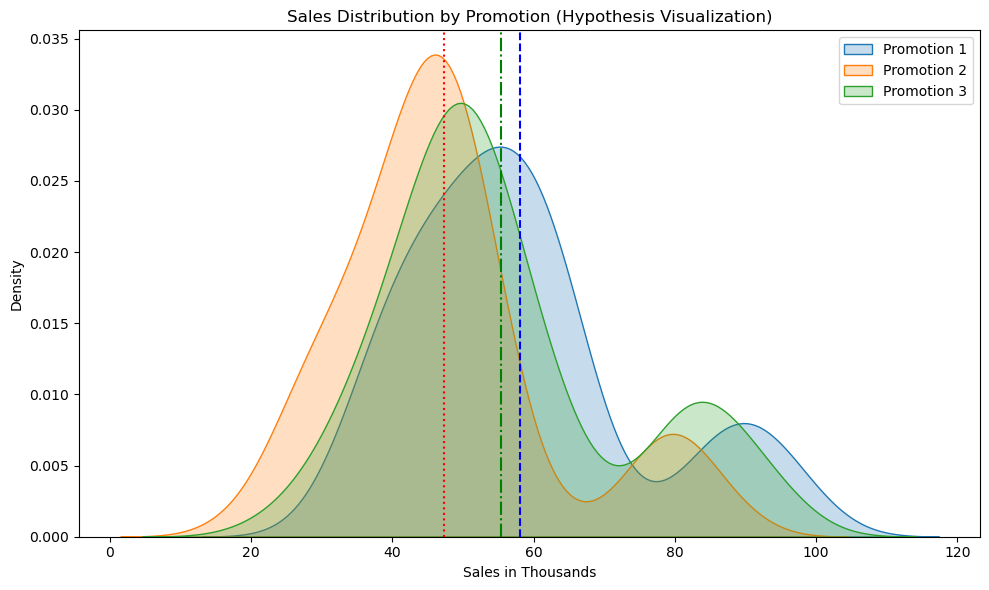

In [32]:
plt.figure(figsize=(10, 6))

sns.kdeplot(promo1, label="Promotion 1", fill=True)
sns.kdeplot(promo2, label="Promotion 2", fill=True)
sns.kdeplot(promo3, label="Promotion 3", fill=True)

plt.axvline(promo1.mean(), linestyle="--", color="blue")
plt.axvline(promo2.mean(), linestyle=":", color="red")
plt.axvline(promo3.mean(), linestyle="-.", color="green")

plt.title("Sales Distribution by Promotion (Hypothesis Visualization)")
plt.xlabel("Sales in Thousands")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df.groupby("Promotion")["SalesInThousands"].mean().sort_values(ascending=False)


Vidutiniai pardavimai pagal akciją:

Promotion 1: 58.10  
Promotion 3: 55.36  
Promotion 2: 47.33  

Promotion 1 turi didžiausią vidutinį pardavimų lygį, šiek tiek lenkia Promotion 3. Promotion 2 pasižymi mažiausiais vidutiniais pardavimais.

Grafike matyti, kad Promotion 1 ir 3 pasiskirstymai yra pasislinkę į dešinę (didesni pardavimai), o Promotion 2 labiau koncentruojasi žemesnėse reikšmėse.

Išvada: pagal vidurkį efektyviausia yra Promotion 1, o mažiausiai efektyvi – Promotion 2. Promotion 3 užima tarpinę poziciją.

Trijų akcijų pardavimų pasiskirstymai ir jų vidurkiai (punktyrinės linijos).

Promotion 1 pasiskirstymas labiausiai pasislinkęs į dešinę, todėl jo vidurkis yra didžiausias. Tai rodo aukštesnius tipinius pardavimus.

Promotion 3 taip pat generuoja palyginti aukštus pardavimus, tačiau vidurkis yra šiek tiek mažesnis nei Promotion 1.

Promotion 2 pasiskirstymas labiau koncentruotas ties mažesnėmis reikšmėmis, o jo vidurkis yra žemiausias iš trijų.

Nors pasiskirstymai dalinai persidengia, Promotion 1 ir 3 bendrai rodo stipresnius rezultatus nei Promotion 2.


#### Reklamos kampanijų vidutinių pardavimų palyginimas

**Vidutiniai pardavimai pagal kampaniją**

| Kampanija | Vidutiniai pardavimai (tūkst.) |
|----------|--------------------------------|
| Promotion 1 | **58.10** |
| Promotion 3 | 55.36 |
| Promotion 2 | 47.33 |

#### Rezultatų interpretacija

- **Promotion 1** turi **didžiausią vidutinį pardavimų lygį**
- **Promotion 3** yra antra pagal efektyvumą
- **Promotion 2** turi **mažiausią poveikį pardavimams**

#### Statistinis kontekstas

- ANOVA testas parodė, kad:
  - skirtumai tarp kampanijų yra **statistiškai reikšmingi**
- Tai reiškia, kad vidurkių skirtumai:
  - **nėra atsitiktiniai**
  - turi realų poveikį pardavimams

### Verslo sprendimas

- Rekomenduojama pasirinkti **Promotion 1** naujo produkto reklamai
- Ši kampanija:
  - generuoja didžiausią vidutinį pardavimų efektą
  - yra pagrįsta statistiniais įrodymais

Pastaba
Norint galutinai patvirtinti sprendimą:
- galima atlikti **post-hoc (Tukey) testą**
- tai leistų tiksliai nustatyti, **kurios kampanijos poros tarpusavyje skirias**


In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df["SalesInThousands"],
    groups=df["Promotion"],
    alpha=0.05
)

tukey.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


### Post-hoc analizė: Tukey HSD rezultatai

#### Tukey HSD palyginimų lentelė (α = 0.05)

| group1 | group2 | mean diff | p-adj | atmesti |
|------|------|-----------|-------|------------|
| 1 | 2 | -10.77 | < 0.001 | **Taip** |
| 1 | 3 | -2.73 | 0.244 | **Ne** |
| 2 | 3 | 8.04 | < 0.001 | **Taip** |


#### Rezultatų interpretacija

- **Promotion 1 vs Promotion 2**
  - Pardavimų skirtumas ≈ **10.8 tūkst.**
  - Skirtumas **statistiškai reikšmingas**
  - Promotion 1 **aiškiai efektyvesnė** už Promotion 2

- **Promotion 1 vs Promotion 3**
  - Pardavimų skirtumas ≈ **2.7 tūkst.**
  - Skirtumas **nėra statistiškai reikšmingas**
  - Šių dviejų kampanijų efektai **statistiškai panašūs**

- **Promotion 2 vs Promotion 3**
  - Pardavimų skirtumas ≈ **8.0 tūkst.**
  - Skirtumas **statistiškai reikšmingas**
  - Promotion 3 **reikšmingai pranoksta** Promotion 2


### Apibendrinimas

- **Promotion 2** yra **statistiškai silpniausia** kampanija
- **Promotion 1 ir Promotion 3**:
  - abi ženkliai lenkia Promotion 2
  - tarpusavyje **statistiškai nesiskiria**

### Galutinė verslo rekomendacija

- **Pirminis pasirinkimas:** **Promotion 1**
  - didžiausias vidutinis pardavimų lygis
- **Alternatyva:** **Promotion 3**
  - statistiškai lygiavertė Promotion 1
- **Vengtina:** **Promotion 2**

Ši rekomendacija pagrįsta:
- ANOVA testu
- Tukey post-hoc analize
- vidutinių pardavimų palyginimu

## ANOVA (Analysis of Variance) – pagrindai

**ANOVA** naudojama, kai reikia palyginti **daugiau nei dviejų grupių vidurkius**.

### Pagrindinė idėja
- Lyginama:
  - **skirtumai tarp grupių**
  - su **svyravimais grupių viduje**
- Jei skirtumai tarp grupių yra pakankamai dideli → vidurkiai skiriasi reikšmingai

### Naudojamos hipotezės
- **H₀ (nulinė):** visų grupių vidurkiai vienodi
- **H₁ (alternatyvioji):** bent vienos grupės vidurkis skiriasi

### Pagrindiniai terminai
- **F-statistic** – rodo, kiek stiprūs skirtumai tarp grupių
- **p-value** – tikimybė gauti tokį rezultatą, jei H₀ būtų teisinga
- **α (significance level)** – dažniausiai 0.05

### Sprendimas
- p-value < α → **H₀ atmetama**
- p-value ≥ α → **H₀ neatmetama**

---

## Tukey HSD – pagrindai

**Tukey HSD (Honestly Significant Difference)** – post-hoc testas, naudojamas **po ANOVA**.

### Paskirtis
- Nustatyti, **kurios konkrečios grupės tarpusavyje skiriasi**
- Apsaugo nuo klaidingų išvadų, kai daroma daug palyginimų

### Kada naudojamas
- Tik tada, kai **ANOVA parodė reikšmingą skirtumą**

### Pagrindiniai terminai
- **Mean difference (meandiff)** – vidurkių skirtumas tarp dviejų grupių
- **p-adj** – pakoreguota p-reikšmė
- **Confidence interval (lower, upper)** – tikėtinos skirtumo ribos
- **Reject** – ar skirtumas statistiškai reikšmingas

### Sprendimas
- **Reject = True** → grupės skiriasi reikšmingai
- **Reject = False** → grupių skirtumas nereikšmingas

---

## Santrauka

- **ANOVA** atsako: *ar egzistuoja skirtumas tarp grupių?*
- **Tukey HSD** atsako: *kurios konkrečiai grupės skiriasi?*
- Abu metodai kartu leidžia priimti **duomenimis pagrįstą sprendimą**

---
